In [129]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno


In [130]:
df = pd.read_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/AQI data/AQI.csv", sep=";", decimal=',', encoding="utf-8")

df.shape

(4018, 14)

In [131]:
df.head()

,Date,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_PM2.5,Station2_SO2,Station2_NO
0,2014-01-01 00:00:00,1057.0,31.3,67.6,56.0,NaN,1121.0,19.9,27.5,9.3,42.0,NaN,8.5,NaN
1,2014-01-02 00:00:00,1030.0,37.0,89.1,60.0,NaN,1212.0,25.9,44.4,9.9,52.0,NaN,13.5,NaN
2,2014-01-03 00:00:00,1319.0,49.1,196.1,69.0,NaN,1292.0,26.3,60.5,7.5,56.0,NaN,12.6,NaN
3,2014-01-04 00:00:00,1001.0,36.9,94.8,46.0,NaN,952.0,21.6,27.3,7.6,35.0,NaN,14.7,NaN
4,2014-01-05 00:00:00,1155.0,37.3,102.6,39.0,NaN,1001.0,23.4,36.6,12.5,28.0,NaN,12.0,NaN


In [132]:
df.dtypes

Date               object
Station1_CO        object
Station1_NO2      float64
Station1_NOx      float64
Station1_PM10     float64
Station1_SO2      float64
Station2_CO       float64
Station2_NO2      float64
Station2_NOx      float64
Station2_O3       float64
Station2_PM10     float64
Station2_PM2.5    float64
Station2_SO2      float64
Station2_NO       float64
dtype: object

In [133]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
cols = [col for col in df.columns if col != 'Date']

In [134]:
df.dtypes

Date              datetime64[ns]
Station1_CO               object
Station1_NO2             float64
Station1_NOx             float64
Station1_PM10            float64
Station1_SO2             float64
Station2_CO              float64
Station2_NO2             float64
Station2_NOx             float64
Station2_O3              float64
Station2_PM10            float64
Station2_PM2.5           float64
Station2_SO2             float64
Station2_NO              float64
dtype: object

In [135]:
df.head()

,Date,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_PM2.5,Station2_SO2,Station2_NO
0,2014-01-01,1057.0,31.3,67.6,56.0,NaN,1121.0,19.9,27.5,9.3,42.0,NaN,8.5,NaN
1,2014-01-02,1030.0,37.0,89.1,60.0,NaN,1212.0,25.9,44.4,9.9,52.0,NaN,13.5,NaN
2,2014-01-03,1319.0,49.1,196.1,69.0,NaN,1292.0,26.3,60.5,7.5,56.0,NaN,12.6,NaN
3,2014-01-04,1001.0,36.9,94.8,46.0,NaN,952.0,21.6,27.3,7.6,35.0,NaN,14.7,NaN
4,2014-01-05,1155.0,37.3,102.6,39.0,NaN,1001.0,23.4,36.6,12.5,28.0,NaN,12.0,NaN


In [136]:
df_copy = df.copy()
df_copy.set_index('Date', inplace=True)
df_copy

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_PM2.5,Station2_SO2,Station2_NO
Date,,,,,,,,,,,,,
2014-01-01,1057.0,31.3,67.6,56.0,NaN,1121.0,19.9,27.5,9.3,42.0,NaN,8.5,NaN
2014-01-02,1030.0,37.0,89.1,60.0,NaN,1212.0,25.9,44.4,9.9,52.0,NaN,13.5,NaN
2014-01-03,1319.0,49.1,196.1,69.0,NaN,1292.0,26.3,60.5,7.5,56.0,NaN,12.6,NaN
2014-01-04,1001.0,36.9,94.8,46.0,NaN,952.0,21.6,27.3,7.6,35.0,NaN,14.7,NaN
2014-01-05,1155.0,37.3,102.6,39.0,NaN,1001.0,23.4,36.6,12.5,28.0,NaN,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,NaN,46.0,161.3,31.0,NaN,841.0,23.8,38.8,13.1,NaN,22.0,4.9,9.8
2024-12-28,NaN,21.2,48.4,15.0,NaN,651.0,9.2,11.3,24.9,NaN,23.0,4.6,1.3
2024-12-29,NaN,18.1,35.2,24.0,NaN,698.0,8.3,9.1,35.0,NaN,25.0,4.6,0.5


<Axes: >

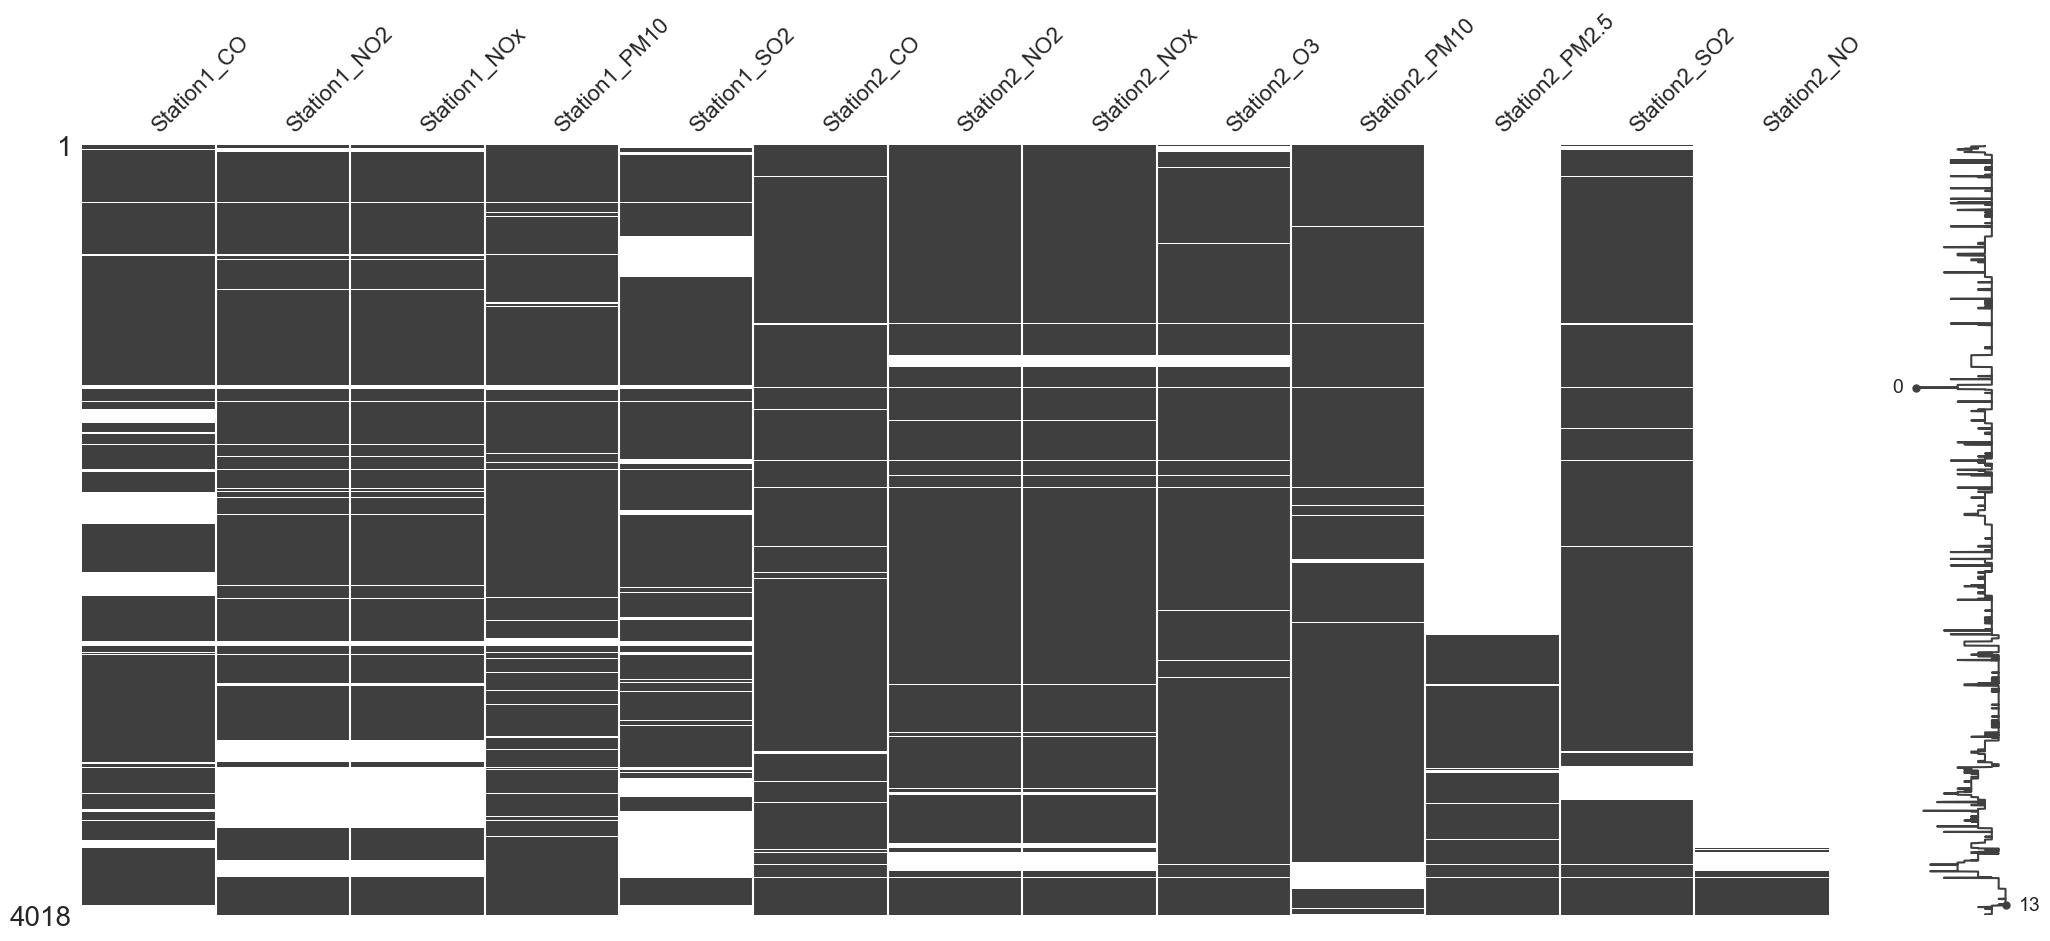

In [137]:
msno.matrix(df_copy)

In [138]:
df.set_index('Date', inplace=True)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekDay'] = df.index.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    
df['Season'] = df.index.month.map(get_season)

In [139]:
df.columns

Index(['Station1_CO', 'Station1_NO2', 'Station1_NOx', 'Station1_PM10',
       'Station1_SO2', 'Station2_CO', 'Station2_NO2', 'Station2_NOx',
       'Station2_O3', 'Station2_PM10', 'Station2_PM2.5', 'Station2_SO2',
       'Station2_NO', 'Year', 'Month', 'Day', 'WeekDay', 'Season'],
      dtype='object')

In [140]:
df.drop(["Station2_NO", "Station2_PM2.5"], axis=1, inplace=True)

In [141]:
type(df)

pandas.core.frame.DataFrame

In [142]:
daily_avg = df[["Station1_PM10", "Station2_PM10", "Station1_NO2", "Station2_NO2", "Station1_SO2", "Station2_SO2"]].mean()
print("24-hour average")
print(daily_avg)

24-hour average
Station1_PM10    25.824156
Station2_PM10    23.278142
Station1_NO2     32.630597
Station2_NO2     18.681939
Station1_SO2      3.630814
Station2_SO2      3.306286
dtype: float64


In [143]:
seasonal_avg = df.groupby('Season')[["Station1_PM10", "Station2_PM10",  "Station1_SO2", "Station2_SO2"]].mean()
print("Seasonal average")
print(seasonal_avg)

Seasonal average
        Station1_PM10  Station2_PM10  Station1_SO2  Station2_SO2
Season                                                          
Fall        28.669371      25.272819      3.455000      2.939171
Spring      23.094225      21.219486      3.737185      3.258495
Summer      19.725345      18.761853      3.251026      2.838369
Winter      31.862955      27.584631      4.097490      4.285147


In [144]:
yearly_avg = df.groupby('Year')[["Station1_PM10", "Station2_PM10",  "Station1_SO2", "Station2_SO2"]].mean()
print("Yearly average")
print(yearly_avg)

Yearly average
      Station1_PM10  Station2_PM10  Station1_SO2  Station2_SO2
Year                                                          
2014      33.787709      26.533520      5.249085      4.544776
2015      31.524355      26.571031      5.143791      3.945706
2016      29.453521      24.044077      2.966940      3.095856
2017      28.982249      24.451791      3.182698      3.442700
2018      27.798295      24.398352      3.496096      3.282044
2019      26.826923      26.124260      2.564602      2.889045
2020      23.419444      21.869444      2.850599      3.260989
2021      21.921384      21.140884      4.409841      3.064384
2022      21.665680      19.421918      3.553963      4.033762
2023      18.745042      17.513889      4.130337      1.331739
2024      19.673973      24.840183      3.879167      2.948753


In [145]:
missing_values = df.isnull().sum()
print(missing_values)

Station1_CO      587
Station1_NO2     668
Station1_NOx     668
Station1_PM10    168
Station1_SO2     948
Station2_CO      100
Station2_NO2     264
Station2_NOx     264
Station2_O3      158
Station2_PM10    207
Station2_SO2     248
Year               0
Month              0
Day                0
WeekDay            0
Season             0
dtype: int64


In [146]:
df

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_SO2,Year,Month,Day,WeekDay,Season
Date,,,,,,,,,,,,,,,,
2014-01-01,1057.0,31.3,67.6,56.0,NaN,1121.0,19.9,27.5,9.3,42.0,8.5,2014,1,1,Wednesday,Winter
2014-01-02,1030.0,37.0,89.1,60.0,NaN,1212.0,25.9,44.4,9.9,52.0,13.5,2014,1,2,Thursday,Winter
2014-01-03,1319.0,49.1,196.1,69.0,NaN,1292.0,26.3,60.5,7.5,56.0,12.6,2014,1,3,Friday,Winter
2014-01-04,1001.0,36.9,94.8,46.0,NaN,952.0,21.6,27.3,7.6,35.0,14.7,2014,1,4,Saturday,Winter
2014-01-05,1155.0,37.3,102.6,39.0,NaN,1001.0,23.4,36.6,12.5,28.0,12.0,2014,1,5,Sunday,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,NaN,46.0,161.3,31.0,NaN,841.0,23.8,38.8,13.1,NaN,4.9,2024,12,27,Friday,Winter
2024-12-28,NaN,21.2,48.4,15.0,NaN,651.0,9.2,11.3,24.9,NaN,4.6,2024,12,28,Saturday,Winter
2024-12-29,NaN,18.1,35.2,24.0,NaN,698.0,8.3,9.1,35.0,NaN,4.6,2024,12,29,Sunday,Winter


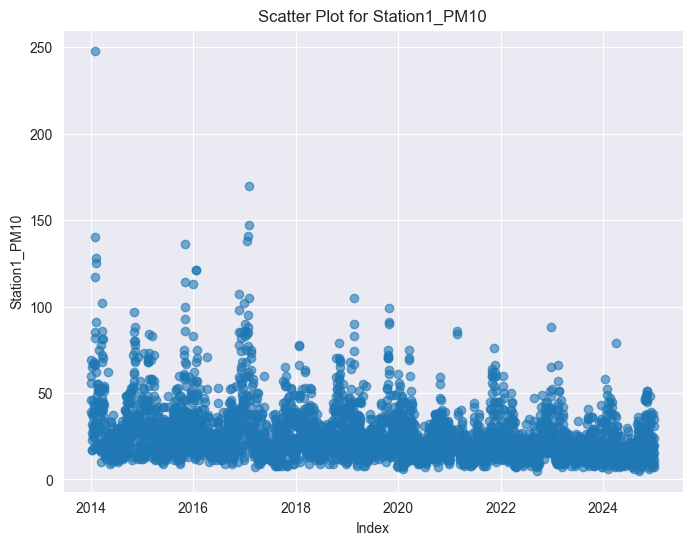

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot_column(df, column_name):
    """
    This function creates a scatter plot of a given column.
    
    Parameters:
    - df: pandas DataFrame with the data.
    - column_name: the name of the column to plot.
    
    Returns:
    - None: This function displays the plot.
    """
    # Check if the column exists in the DataFrame
    if column_name in df.columns:
        plt.figure(figsize=(8, 6))
        
        # Plotting the column values against their index
        plt.scatter(df.index, df[column_name], alpha=0.6)
        
        # Adding labels and title
        plt.xlabel('Index')
        plt.ylabel(column_name)
        plt.title(f'Scatter Plot for {column_name}')
        
        # Display the plot
        plt.show()
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

scatter_plot_column(df, "Station1_PM10")

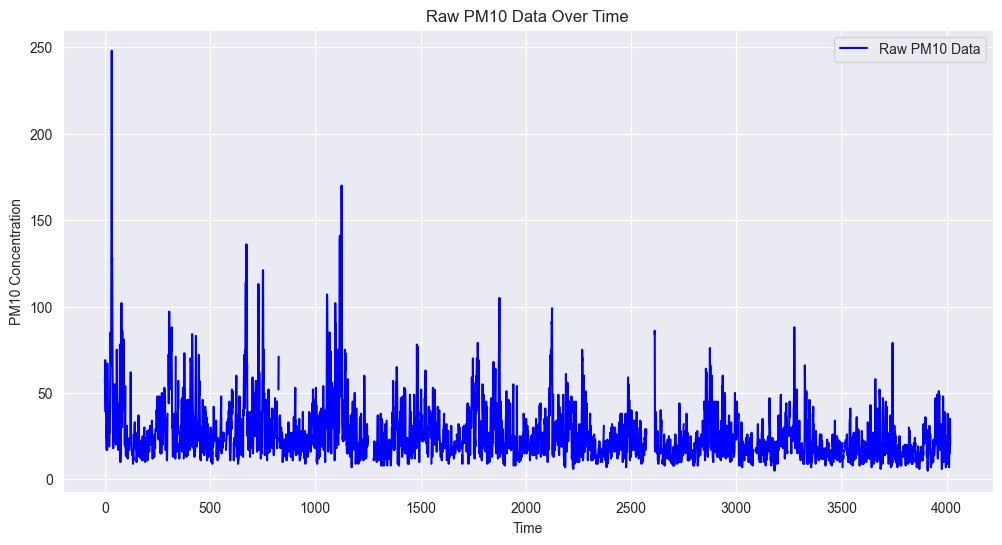

In [148]:
y_raw = df['Station1_PM10'].values
plt.figure(figsize=(12, 6))
plt.plot(y_raw, label="Raw PM10 Data", color='blue')
plt.xlabel("Time")
plt.ylabel("PM10 Concentration")
plt.title("Raw PM10 Data Over Time")
plt.legend()
plt.show()


In [149]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer with a specified number of neighbors (default is 5)
knn_imputer = KNNImputer(n_neighbors=5)

# Extract pollutants (columns after 'Station1_' or 'Station2_')
pollutants = set([col.split("_")[-1] for col in df.columns if "_" in col])
print(pollutants)

# Iterate through each pollutant to perform KNN imputation for both stations
for pol in pollutants:
    station1_col = f"Station1_{pol}"
    station2_col = f"Station2_{pol}"

    # Check if both columns exist in the DataFrame
    if station1_col in df.columns and station2_col in df.columns:
        # Create a subset of data with both columns for imputation
        data_to_impute = df[[station1_col, station2_col]]

        # Perform KNN imputation
        imputed_data = knn_imputer.fit_transform(data_to_impute)

        # Reassign the imputed values back to the DataFrame
        df[station1_col], df[station2_col] = imputed_data[:, 0], imputed_data[:, 1]


{'CO', 'O3', 'NO2', 'PM10', 'NOx', 'SO2'}


In [150]:
df

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_SO2,Year,Month,Day,WeekDay,Season
Date,,,,,,,,,,,,,,,,
2014-01-01,1057.0,31.3,67.6,56.0,6.96,1121.0,19.9,27.5,9.3,42.0,8.5,2014,1,1,Wednesday,Winter
2014-01-02,1030.0,37.0,89.1,60.0,11.12,1212.0,25.9,44.4,9.9,52.0,13.5,2014,1,2,Thursday,Winter
2014-01-03,1319.0,49.1,196.1,69.0,10.18,1292.0,26.3,60.5,7.5,56.0,12.6,2014,1,3,Friday,Winter
2014-01-04,1001.0,36.9,94.8,46.0,11.66,952.0,21.6,27.3,7.6,35.0,14.7,2014,1,4,Saturday,Winter
2014-01-05,1155.0,37.3,102.6,39.0,9.32,1001.0,23.4,36.6,12.5,28.0,12.0,2014,1,5,Sunday,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,793.0,46.0,161.3,31.0,4.32,841.0,23.8,38.8,13.1,28.0,4.9,2024,12,27,Friday,Winter
2024-12-28,570.2,21.2,48.4,15.0,5.10,651.0,9.2,11.3,24.9,15.2,4.6,2024,12,28,Saturday,Winter
2024-12-29,738.0,18.1,35.2,24.0,5.10,698.0,8.3,9.1,35.0,23.2,4.6,2024,12,29,Sunday,Winter


In [151]:
scatter_plot_column(df, "Station1_PM10_Imputed")

Column 'Station1_PM10_Imputed' not found in the DataFrame.


In [152]:
df.describe()

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_SO2,Year,Month,Day
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.00000,4018.000000,4018.000000,3860.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,520.608792,32.330073,66.638174,25.740131,3.623809,491.13085,18.744402,29.212280,49.582824,23.004071,3.312685,2019.000747,6.522648,15.730463
std,245.821448,12.604618,39.399953,15.973865,1.836286,269.71877,10.333895,23.283129,22.370858,14.170765,1.834848,3.162868,3.449210,8.801536
min,26.000000,5.100000,8.700000,5.000000,0.500000,68.00000,3.500000,5.100000,1.300000,3.000000,0.300000,2014.000000,1.000000,1.000000
25%,359.000000,23.320000,38.800000,16.000000,2.400000,303.55000,11.400000,14.800000,31.400000,14.000000,2.200000,2016.000000,4.000000,8.000000
50%,466.000000,31.300000,58.600000,21.400000,3.260000,419.00000,16.500000,22.350000,51.500000,19.000000,3.100000,2019.000000,7.000000,16.000000
75%,622.900000,39.500000,82.800000,31.000000,4.300000,607.00000,23.475000,34.300000,67.025000,27.000000,4.000000,2022.000000,10.000000,23.000000
max,3453.000000,96.900000,338.200000,248.000000,19.100000,3022.00000,94.600000,330.100000,112.800000,186.000000,19.900000,2024.000000,12.000000,31.000000


In [153]:
yearly_avg = df.groupby('Year')[["Station1_PM10", "Station2_PM10", "Station1_SO2", "Station2_SO2"]].mean()
print("Yearly average")
print(yearly_avg)

Yearly average
      Station1_PM10  Station2_PM10  Station1_SO2  Station2_SO2
Year                                                          
2014      34.093699      26.812055      5.312899      4.513433
2015      31.412603      26.509589      4.342061      3.939778
2016      29.511475      23.973224      2.966940      3.100492
2017      28.379792      24.419392      3.178824      3.444565
2018      27.610411      24.403836      3.473016      3.283360
2019      26.789589      26.175342      2.607562      2.899507
2020      23.262361      21.888738      2.879235      3.257596
2021      22.272329      21.097534      4.353041      3.064384
2022      21.419178      19.421918      3.604458      3.940416
2023      18.746849      17.500822      3.606579      2.044078
2024      19.656284      20.848634      3.541350      2.953638


In [154]:
df_values = df.drop(["Year", "Month", "Season", "Day", "WeekDay"], axis=1)
df_values

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_SO2
Date,,,,,,,,,,,
2014-01-01,1057.0,31.3,67.6,56.0,6.96,1121.0,19.9,27.5,9.3,42.0,8.5
2014-01-02,1030.0,37.0,89.1,60.0,11.12,1212.0,25.9,44.4,9.9,52.0,13.5
2014-01-03,1319.0,49.1,196.1,69.0,10.18,1292.0,26.3,60.5,7.5,56.0,12.6
2014-01-04,1001.0,36.9,94.8,46.0,11.66,952.0,21.6,27.3,7.6,35.0,14.7
2014-01-05,1155.0,37.3,102.6,39.0,9.32,1001.0,23.4,36.6,12.5,28.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,793.0,46.0,161.3,31.0,4.32,841.0,23.8,38.8,13.1,28.0,4.9
2024-12-28,570.2,21.2,48.4,15.0,5.10,651.0,9.2,11.3,24.9,15.2,4.6
2024-12-29,738.0,18.1,35.2,24.0,5.10,698.0,8.3,9.1,35.0,23.2,4.6


In [155]:
df.columns

Index(['Station1_CO', 'Station1_NO2', 'Station1_NOx', 'Station1_PM10',
       'Station1_SO2', 'Station2_CO', 'Station2_NO2', 'Station2_NOx',
       'Station2_O3', 'Station2_PM10', 'Station2_SO2', 'Year', 'Month', 'Day',
       'WeekDay', 'Season'],
      dtype='object')

In [ ]:
df.drop("Station1", axis=1, inplace=True)

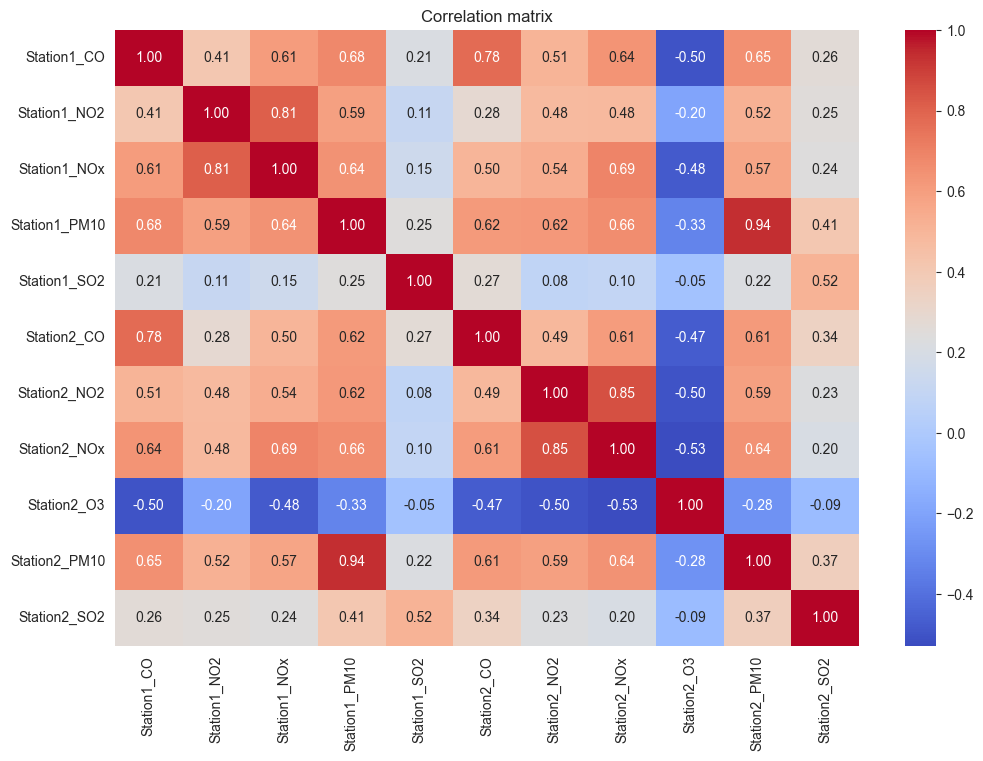

In [156]:
import seaborn as sns

corr_matrix = df_values[df_values.columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [157]:
def plot_mean(df, grouping):
    station1_mean = df.groupby(grouping)['Station1_PM10'].mean()
    station2_mean = df.groupby(grouping)['Station2_PM10'].mean()
    
    station1_mean.plot(label='Kalotaszeg ter station - PM10', marker='o')  
    station2_mean.plot(label='Hajnal ut station - PM10', marker='o') 
    
    plt.title(f'{grouping} Average PM10 Levels') 
    plt.xlabel(f'{grouping}')                      
    plt.ylabel('PM10 Concentration')        
    plt.legend()                           
    
    plt.show()

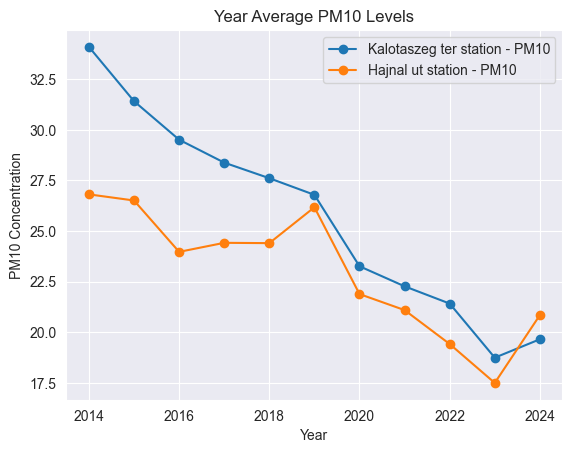

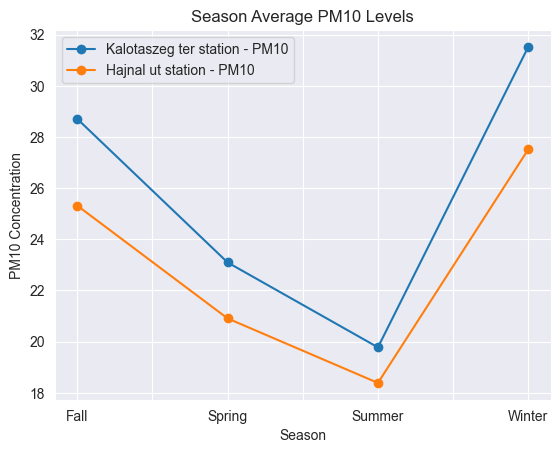

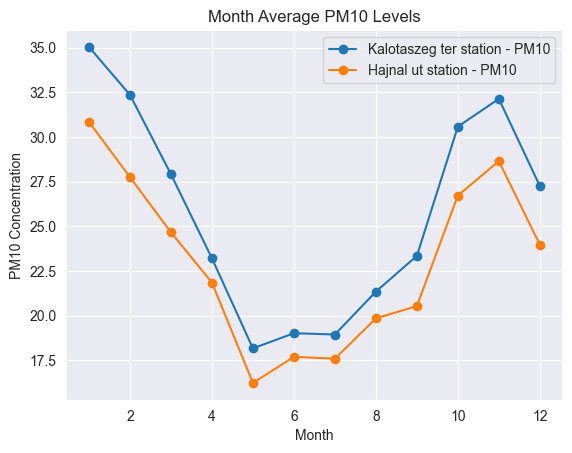

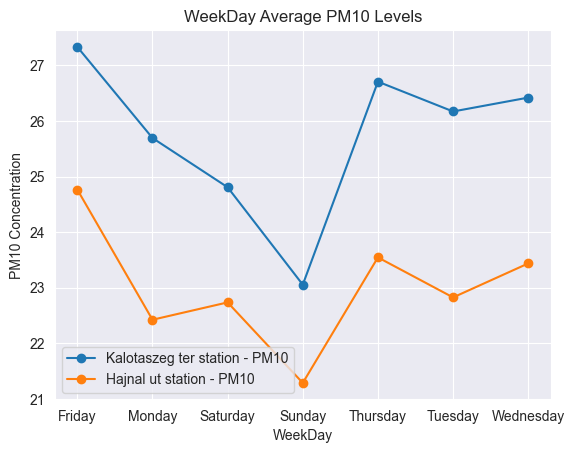

In [158]:
plot_mean(df, "Year")
plot_mean(df, "Season")
plot_mean(df, "Month")
plot_mean(df, "WeekDay")

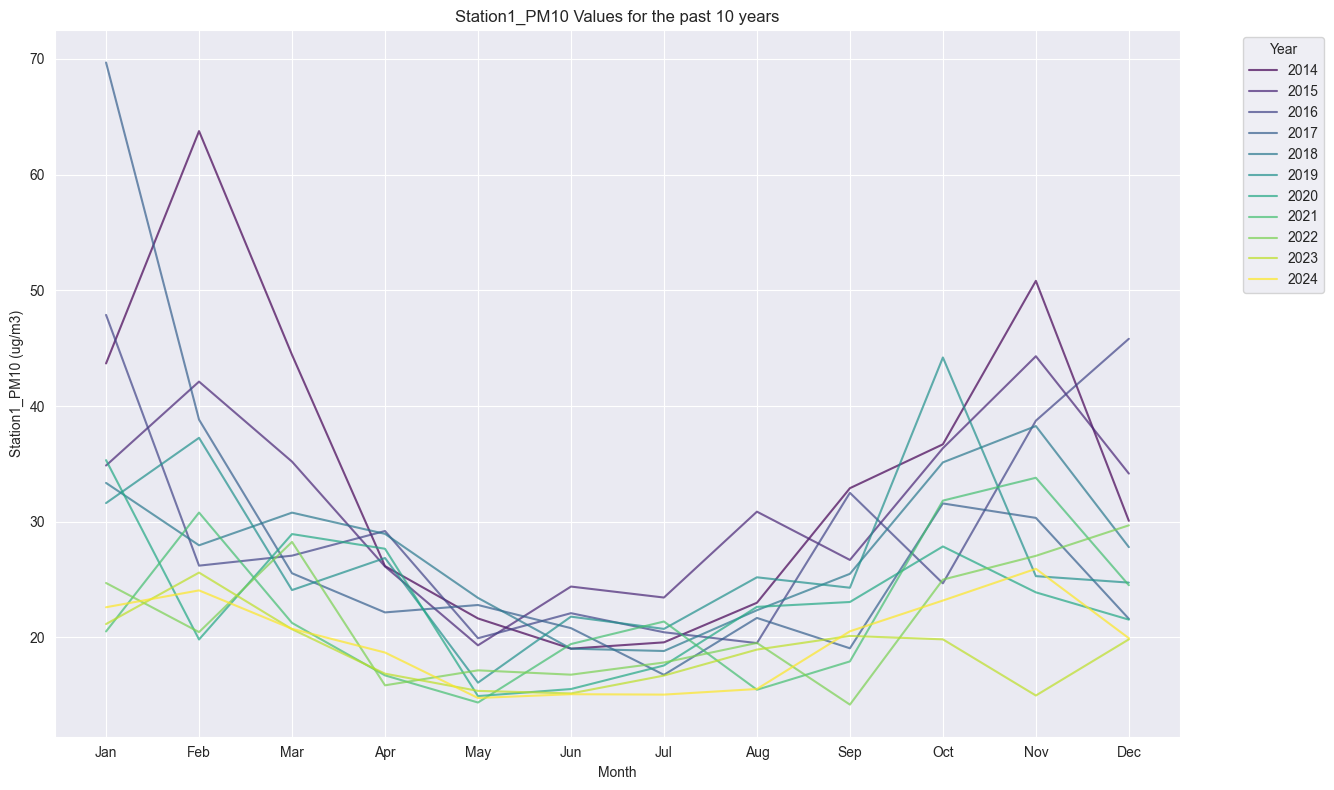

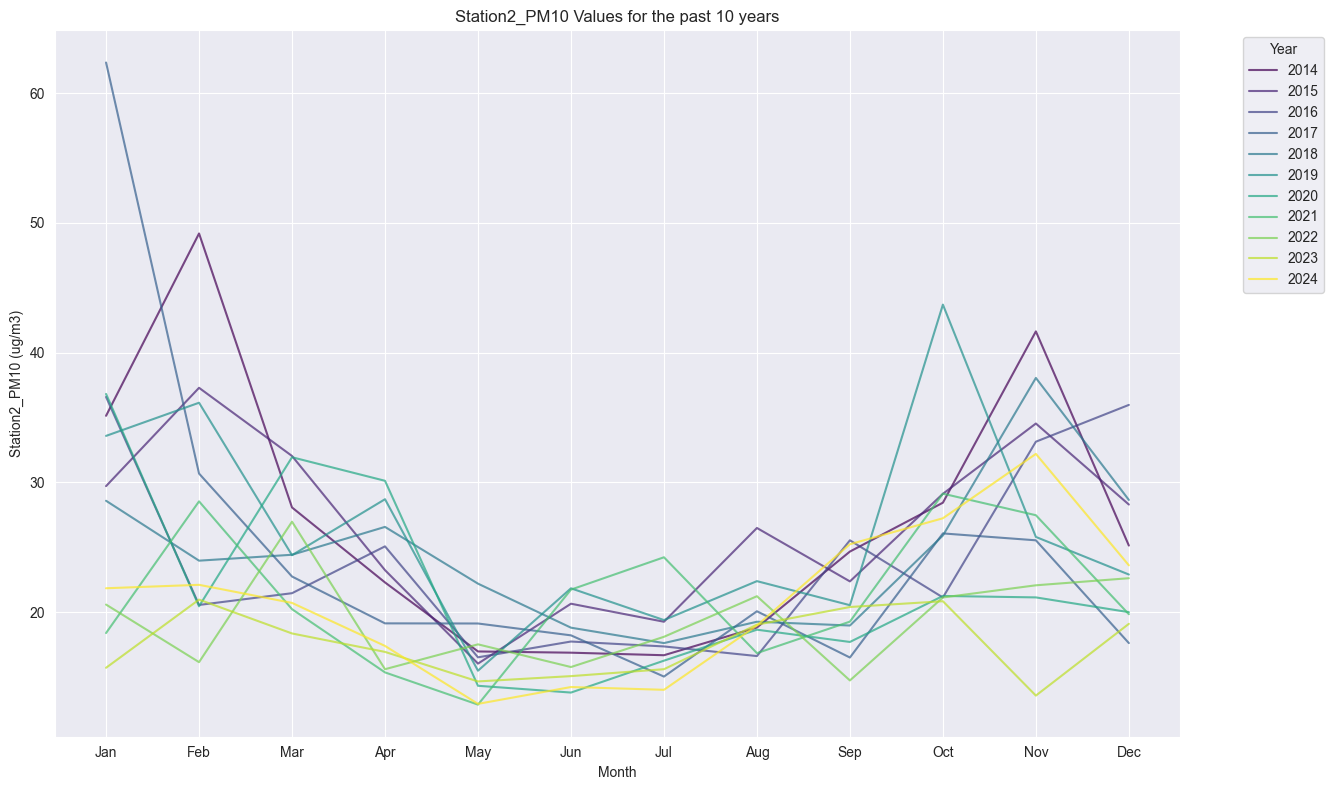

In [159]:
from matplotlib import cm

def plot_aqi(df, value):
    unique_years = df['Year'].unique()
    months = np.arange(1, 13) 
    
    plt.figure(figsize=(12, 8))
    
    colors = cm.viridis(np.linspace(0, 1, len(unique_years)))
    
    for i, year in enumerate(unique_years):
        monthly_data = df[df['Year'] == year].groupby('Month')[value].mean()
    
        plt.plot(
            months, 
            monthly_data, 
            color=colors[i], 
            alpha=0.7, 
            label=f"{year}"
        )
    
    plt.title(f"{value} Values for the past 10 years")
    plt.xlabel("Month")
    plt.ylabel(f"{value} (ug/m3)")
    
    plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
plot_aqi(df, "Station1_PM10")
plot_aqi(df, "Station2_PM10")


<Axes: xlabel='Date'>

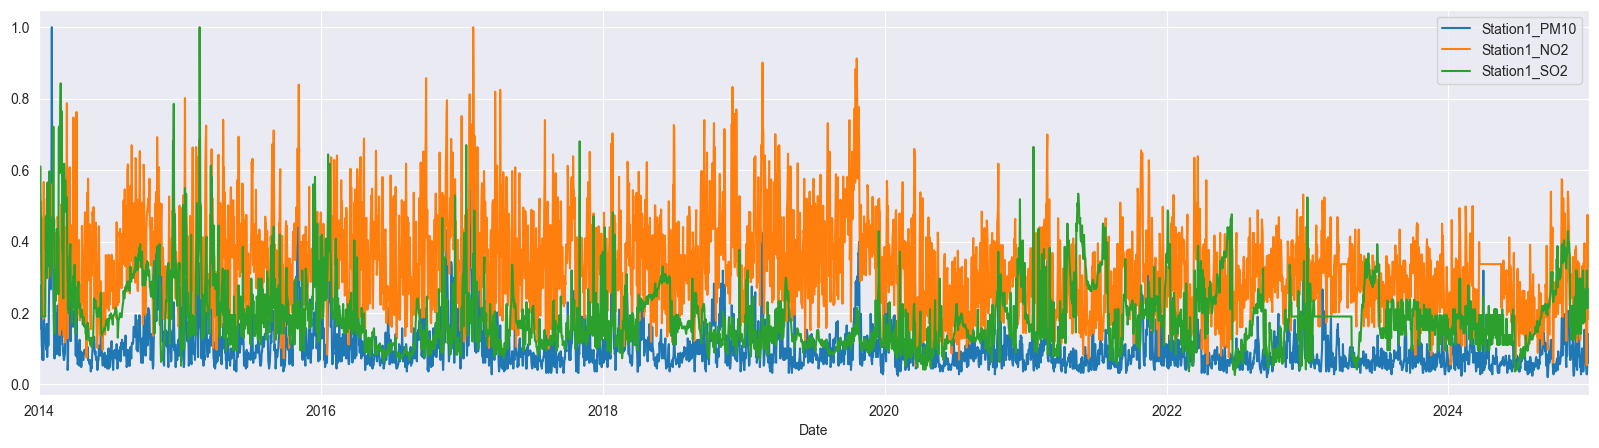

In [160]:
fig, ax = plt.subplots(figsize=(20, 5))

candidates = df[['Station1_PM10','Station1_NO2', 'Station1_SO2']]
candidates /= candidates.max(axis=0)
candidates.plot(ax=ax)

<Axes: xlabel='Date'>

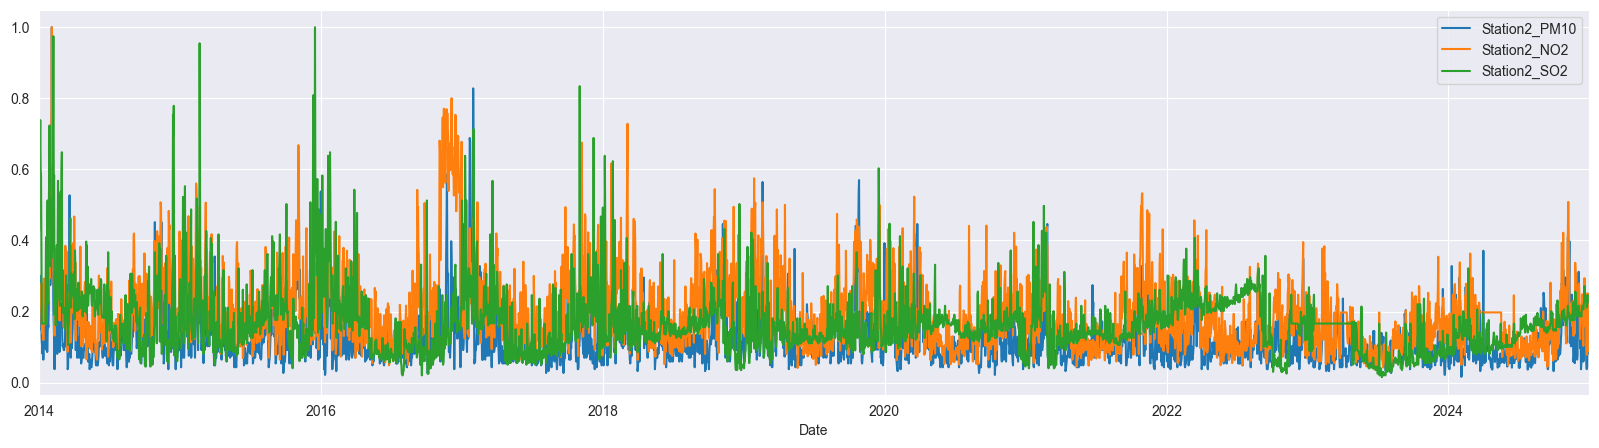

In [161]:
fig1, ax1 = plt.subplots(figsize=(20, 5))
candidates1 = df[['Station2_PM10', 'Station2_NO2', 'Station2_SO2']]
candidates1 /= candidates1.max(axis=0)
candidates1.plot(ax=ax1)

In [193]:
def plot_with_threshold(df, pollutant, threshold):
    fig, ax = plt.subplots(figsize=(20, 5))
    candidates = df[pollutant]
    ax.axhline(y=threshold, linestyle='--', linewidth=1, color='red')
    candidates.plot()

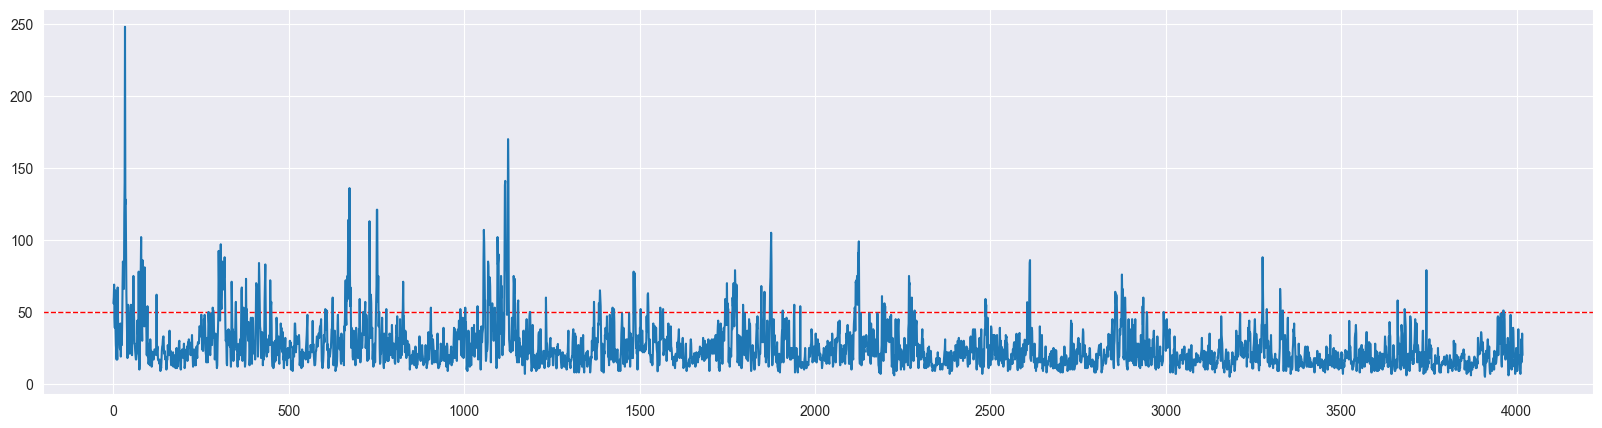

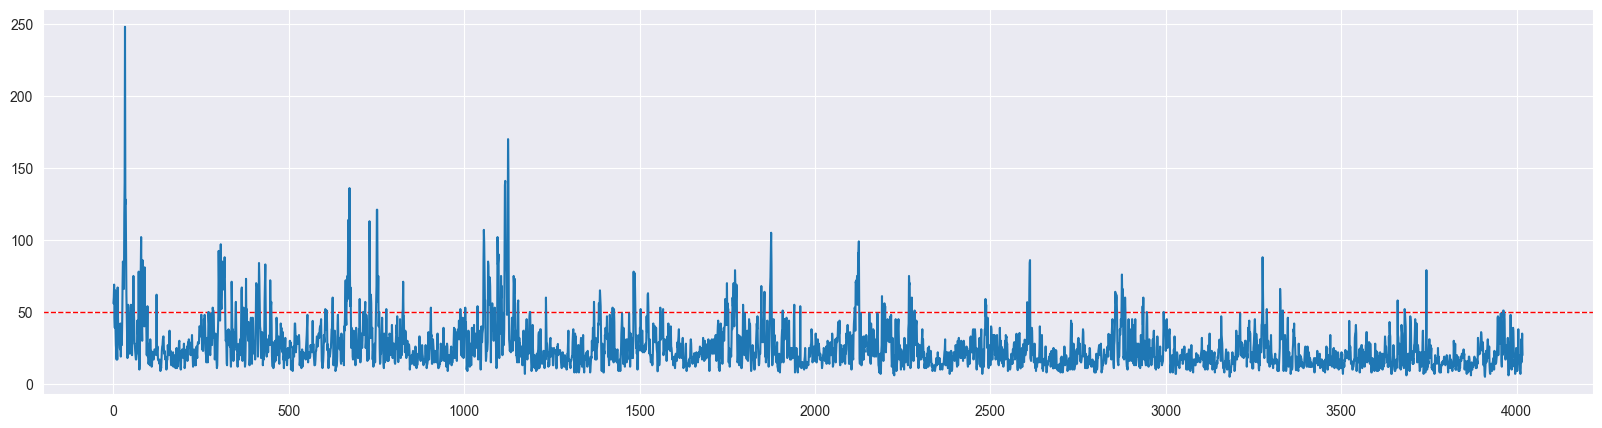

In [196]:
plot_with_threshold(df, "Station1_PM10", 50)

plot_with_threshold(df, "Station1_PM10", 50)

In [164]:
df.to_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/cleaned_AQI.csv")

In [165]:
wind_df = pd.read_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/final_data/wind.csv")
wind_df.shape

(4018, 33)

In [166]:
cols_to_keep = [
       'datetime', 'temp', 'humidity', 'precip', 
       'precipcover', 'cloudcover',
       'windspeed', 'winddir', 'visibility',
       ]

In [167]:
wind_df = wind_df[cols_to_keep]

In [168]:
wind_df.set_index('datetime', inplace=True)

In [169]:
wind_df

,temp,humidity,precip,precipcover,cloudcover,windspeed,winddir,visibility
datetime,,,,,,,,
2023-05-01,15.5,49.0,0.096,4.17,8.3,21.4,21.2,10.0
2023-05-02,17.6,51.6,0.000,0.00,43.8,14.6,121.4,11.7
2023-05-03,17.1,60.2,0.000,0.00,77.3,25.9,20.7,11.4
2023-05-04,16.0,59.0,0.004,4.17,65.9,24.6,5.3,11.1
2023-05-05,15.6,60.6,0.001,4.17,48.6,14.1,297.9,10.0
...,...,...,...,...,...,...,...,...
2015-12-27,2.3,99.1,0.001,4.17,71.9,12.1,211.2,0.6
2015-12-28,1.2,99.1,0.007,12.50,100.0,10.8,245.1,1.6
2015-12-29,2.7,85.8,0.196,4.17,46.3,24.9,30.5,14.5


In [170]:
wind_df.isnull().sum()

temp           0
humidity       0
precip         0
precipcover    0
cloudcover     0
windspeed      0
winddir        0
visibility     0
dtype: int64

In [171]:
df.index = pd.to_datetime(df.index).normalize() 
wind_df.index = pd.to_datetime(wind_df.index).normalize()

In [172]:
final_df = pd.merge(df, wind_df, left_index=True, right_index=True)

In [173]:
final_df.to_csv("final_data.csv")

In [174]:
final_df.head()

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,...,WeekDay,Season,temp,humidity,precip,precipcover,cloudcover,windspeed,winddir,visibility
2014-01-01,1057.0,31.3,67.6,56.0,6.96,1121.0,19.9,27.5,9.3,42.0,...,Wednesday,Winter,1.7,91.5,0.000,0.00,58.3,7.3,101.7,2.6
2014-01-02,1030.0,37.0,89.1,60.0,11.12,1212.0,25.9,44.4,9.9,52.0,...,Thursday,Winter,2.9,83.0,0.000,0.00,60.4,10.9,136.7,6.4
2014-01-03,1319.0,49.1,196.1,69.0,10.18,1292.0,26.3,60.5,7.5,56.0,...,Friday,Winter,3.7,82.9,0.000,0.00,61.5,14.3,176.1,11.0
2014-01-04,1001.0,36.9,94.8,46.0,11.66,952.0,21.6,27.3,7.6,35.0,...,Saturday,Winter,6.4,88.5,0.398,4.17,83.2,17.9,154.4,8.0
2014-01-05,1155.0,37.3,102.6,39.0,9.32,1001.0,23.4,36.6,12.5,28.0,...,Sunday,Winter,8.6,79.0,0.300,12.50,92.1,21.4,154.1,18.0


In [175]:
final_df['is_heating_season'] = np.where(final_df['Season'].isin(["Winter", "Fall"]), 1, 0)
final_df['is_work_day'] = np.where(final_df['WeekDay'].isin(["Monay", "Tuesday", "Wednesday", "Thursday", "Friday"]), 1, 0)

In [176]:
final_df.drop(["Year", "Season", "WeekDay", "Day", "Month"], axis=1, inplace=True)
final_df

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,...,temp,humidity,precip,precipcover,cloudcover,windspeed,winddir,visibility,is_heating_season,is_work_day
2014-01-01,1057.0,31.3,67.6,56.0,6.96,1121.0,19.9,27.5,9.3,42.0,...,1.7,91.5,0.000,0.00,58.3,7.3,101.7,2.6,1,1
2014-01-02,1030.0,37.0,89.1,60.0,11.12,1212.0,25.9,44.4,9.9,52.0,...,2.9,83.0,0.000,0.00,60.4,10.9,136.7,6.4,1,1
2014-01-03,1319.0,49.1,196.1,69.0,10.18,1292.0,26.3,60.5,7.5,56.0,...,3.7,82.9,0.000,0.00,61.5,14.3,176.1,11.0,1,1
2014-01-04,1001.0,36.9,94.8,46.0,11.66,952.0,21.6,27.3,7.6,35.0,...,6.4,88.5,0.398,4.17,83.2,17.9,154.4,8.0,1,0
2014-01-05,1155.0,37.3,102.6,39.0,9.32,1001.0,23.4,36.6,12.5,28.0,...,8.6,79.0,0.300,12.50,92.1,21.4,154.1,18.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,793.0,46.0,161.3,31.0,4.32,841.0,23.8,38.8,13.1,28.0,...,-0.7,88.4,0.000,0.00,41.7,9.4,214.4,7.9,1,1
2024-12-28,570.2,21.2,48.4,15.0,5.10,651.0,9.2,11.3,24.9,15.2,...,-2.1,99.0,0.000,0.00,87.4,7.5,201.5,0.5,1,0
2024-12-29,738.0,18.1,35.2,24.0,5.10,698.0,8.3,9.1,35.0,23.2,...,0.1,99.7,0.000,0.00,98.2,9.3,189.6,1.8,1,0
2024-12-30,674.0,23.7,46.5,35.0,4.50,765.0,11.4,12.1,38.8,29.2,...,0.1,98.0,0.000,0.00,98.7,9.4,190.6,2.5,1,0


In [177]:
final_df["winddir_rad"] = np.deg2rad(final_df["winddir"])

final_df["winddir_sin"] = np.sin(final_df["winddir_rad"])
final_df["winddir_cos"] = np.cos(final_df["winddir_rad"])

final_df.drop(columns=["winddir", "winddir_rad"], inplace=True)
final_df

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,...,humidity,precip,precipcover,cloudcover,windspeed,visibility,is_heating_season,is_work_day,winddir_sin,winddir_cos
2014-01-01,1057.0,31.3,67.6,56.0,6.96,1121.0,19.9,27.5,9.3,42.0,...,91.5,0.000,0.00,58.3,7.3,2.6,1,1,0.979223,-0.202787
2014-01-02,1030.0,37.0,89.1,60.0,11.12,1212.0,25.9,44.4,9.9,52.0,...,83.0,0.000,0.00,60.4,10.9,6.4,1,1,0.685818,-0.727773
2014-01-03,1319.0,49.1,196.1,69.0,10.18,1292.0,26.3,60.5,7.5,56.0,...,82.9,0.000,0.00,61.5,14.3,11.0,1,1,0.068015,-0.997684
2014-01-04,1001.0,36.9,94.8,46.0,11.66,952.0,21.6,27.3,7.6,35.0,...,88.5,0.398,4.17,83.2,17.9,8.0,1,0,0.432086,-0.901833
2014-01-05,1155.0,37.3,102.6,39.0,9.32,1001.0,23.4,36.6,12.5,28.0,...,79.0,0.300,12.50,92.1,21.4,18.0,1,0,0.436802,-0.899558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,793.0,46.0,161.3,31.0,4.32,841.0,23.8,38.8,13.1,28.0,...,88.4,0.000,0.00,41.7,9.4,7.9,1,1,-0.564967,-0.825113
2024-12-28,570.2,21.2,48.4,15.0,5.10,651.0,9.2,11.3,24.9,15.2,...,99.0,0.000,0.00,87.4,7.5,0.5,1,0,-0.366501,-0.930418
2024-12-29,738.0,18.1,35.2,24.0,5.10,698.0,8.3,9.1,35.0,23.2,...,99.7,0.000,0.00,98.2,9.3,1.8,1,0,-0.166769,-0.985996
2024-12-30,674.0,23.7,46.5,35.0,4.50,765.0,11.4,12.1,38.8,29.2,...,98.0,0.000,0.00,98.7,9.4,2.5,1,0,-0.183951,-0.982935


In [178]:
final_df.isna().sum()
df.fillna(method="ffill", inplace=True)  # Forward fill


/var/folders/0c/_lmn88gn06gfqbnmjydqyxgm0000gn/T/ipykernel_2513/960700808.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill


In [179]:
df.reset_index(inplace=True)

In [180]:
final_df.to_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/final_data/data_for_model.csv")

In [181]:
final_df.columns

Index(['Station1_CO', 'Station1_NO2', 'Station1_NOx', 'Station1_PM10',
       'Station1_SO2', 'Station2_CO', 'Station2_NO2', 'Station2_NOx',
       'Station2_O3', 'Station2_PM10', 'Station2_SO2', 'temp', 'humidity',
       'precip', 'precipcover', 'cloudcover', 'windspeed', 'visibility',
       'is_heating_season', 'is_work_day', 'winddir_sin', 'winddir_cos'],
      dtype='object')

<Axes: >

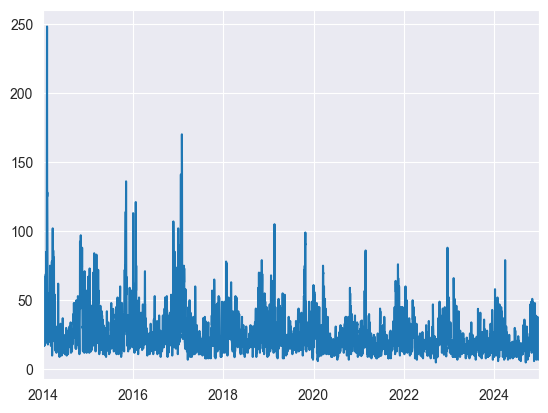

In [182]:
final_df["Station1_PM10"].plot()

In [184]:
df_2024 = final_df[final_df.index.year == 2024]

<Axes: >

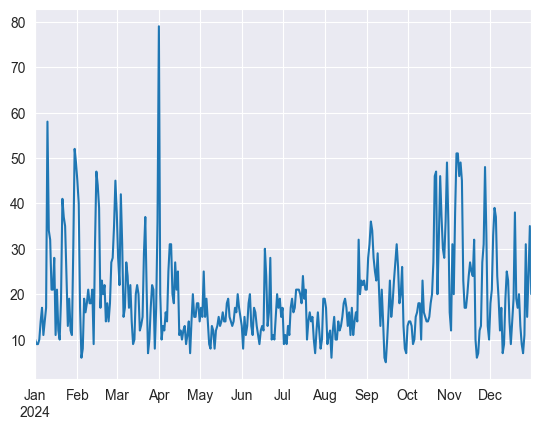

In [189]:
df_2024["Station1_PM10"].plot()

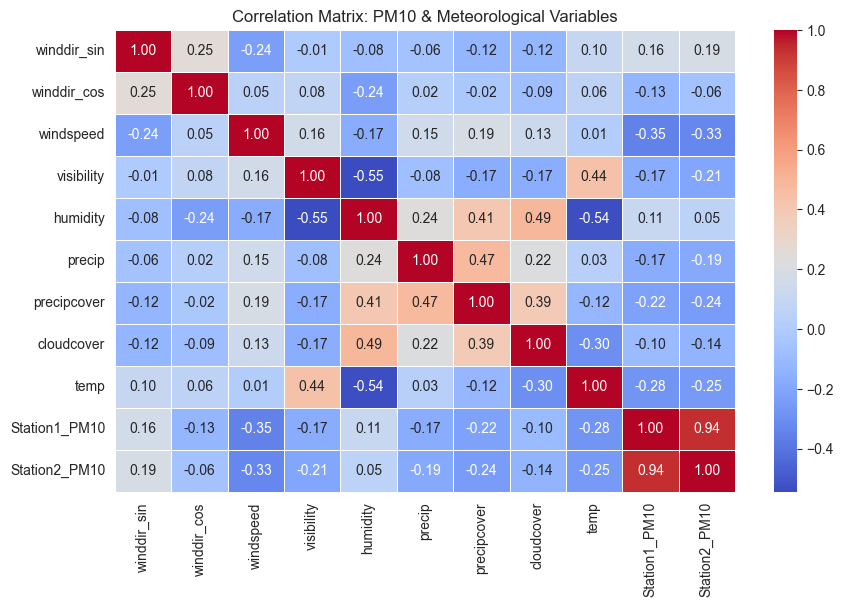

In [191]:
meteorological_data = [
    "winddir_sin",
    "winddir_cos",
    "windspeed",
    "visibility",
    "humidity",
    "precip",
    "precipcover",
    "cloudcover",
    "temp",
    
]
pm10 = "Station1_PM10"
pm10_2 = "Station2_PM10"

corr_data = final_df[meteorological_data + [pm10, pm10_2]]  
corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: PM10 & Meteorological Variables")
plt.show()

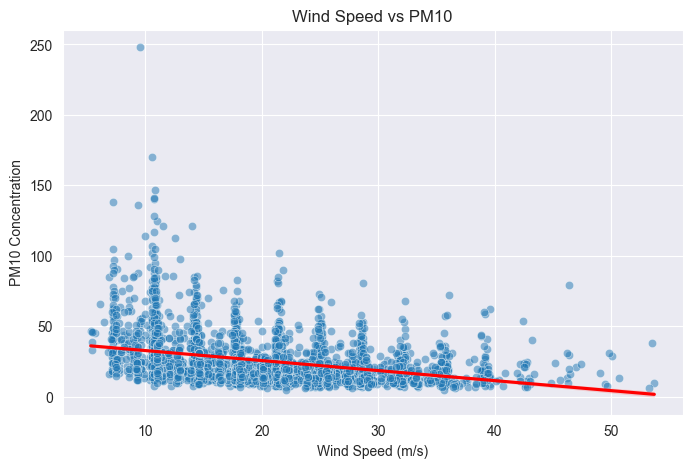

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=final_df, x="windspeed", y="Station1_PM10", alpha=0.5)

sns.regplot(data=final_df, x="windspeed", y="Station1_PM10", scatter=False, color="red")

plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PM10 Concentration")
plt.title("Wind Speed vs PM10")
plt.show()
